In [2]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import ipywidgets as widgets
from IPython.display import display
import os
from datetime import timedelta

import obspy
import pandas as pd
from matplotlib import pyplot as plt
from obspy import UTCDateTime

from insight.util import TraceFile, snr

In [13]:
DATA_DIR = "../data/"
CAT_FILE = "a_quality.parquet"
network, station, location = "XB", "ELYSE", "02"
events = pd.read_parquet(os.path.join(DATA_DIR, CAT_FILE))
event_selection = widgets.Dropdown(options=events.index)
display(event_selection)

Dropdown(options=('S1222a', 'S0976a', 'S1000a', 'S1094b', 'S1133c', 'S0235b', 'S0173a', 'S1048d', 'S1022a', 'S…

(-0.25, 0.25)

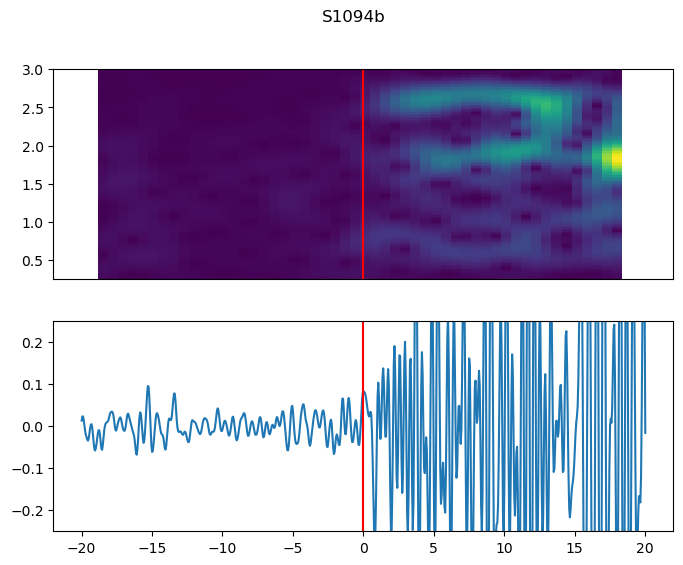

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), dpi=100)
event = events.loc[event_selection.value]
trace_file = TraceFile(network, station, location, event.id)
st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
st = st.filter("bandpass", freqmin= 0.25, freqmax=2.0)
p_arr = event.arrival
start, end = UTCDateTime(p_arr - timedelta(seconds=20)), UTCDateTime(p_arr + timedelta(seconds=20))
sliced_z = st.select(component="Z")[0].slice(start, end)
sliced_z.spectrogram(axes=axs[0], log=False)
sliced_z.normalize()
fig.suptitle(event_selection.value)
axs[0].set_ylim(0.25, 3.0)
axs[0].axvline(20, color='r')
axs[0].set_xticks([])
axs[1].plot(sliced_z.times(reftime=UTCDateTime(p_arr)), sliced_z.data)
axs[1].axvline(0, color='r')
axs[1].set_ylim(-.25, .25)


In [17]:
st

3 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-08-25T03:48:36.442000Z - 2021-08-25T03:54:06.392000Z | 20.0 Hz, 6600 samples
XB.ELYSE.02.BHN | 2021-08-25T03:48:36.442000Z - 2021-08-25T03:54:06.392000Z | 20.0 Hz, 6600 samples
XB.ELYSE.02.BHE | 2021-08-25T03:48:36.442000Z - 2021-08-25T03:54:06.392000Z | 20.0 Hz, 6600 samples